In [1]:
# Impprt required libraries/packages
import numpy as np
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import math

# configure display of graph
%matplotlib inline

In [2]:
# load the csv file as a data frame
birthrate = pd.read_csv('birth-rate.csv')

# summarize the shape of the dataset
print("Dataset Shape (Birth Rate) : ",birthrate.shape)
# see the sample of the data
print("Sample Data: ")
display(birthrate.head())

Dataset Shape (Birth Rate) :  (234, 50)
Sample Data: 


,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Aruba,36.400,35.179,33.863,32.459,30.994,29.513,28.069,26.721,25.518,...,15.024,14.528,14.041,13.579,13.153,12.772,12.441,12.159,11.919,11.716
1,Afghanistan,52.201,52.206,52.208,52.204,52.192,52.168,52.130,52.076,52.006,...,51.229,50.903,50.486,49.984,49.416,48.803,48.177,47.575,47.023,46.538
2,Angola,54.432,54.394,54.317,54.199,54.040,53.836,53.585,53.296,52.984,...,48.662,48.355,48.005,47.545,46.936,46.184,45.330,44.444,43.607,42.875
3,Albania,40.886,40.312,39.604,38.792,37.913,37.008,36.112,35.245,34.421,...,17.713,16.850,16.081,15.444,14.962,14.644,14.485,14.464,14.534,14.649
4,Netherlands Antilles,32.321,30.987,29.618,28.229,26.849,25.518,24.280,23.173,22.230,...,15.809,15.412,15.096,14.824,14.565,14.309,14.051,13.790,13.532,13.281


**Histogram**

Prepared Data: 


,Country,Year,Birth Rate
0,Aruba,1960,36.400
1,Afghanistan,1960,52.201
2,Angola,1960,54.432
3,Albania,1960,40.886
4,Netherlands Antilles,1960,32.321


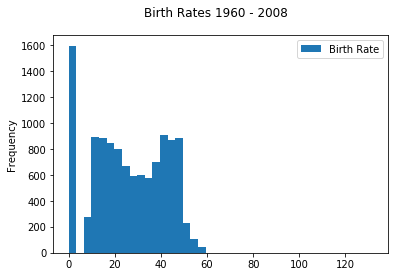

In [3]:
# Prepare data for histogram
birthrate_hist = pd.melt(birthrate, id_vars="Country", var_name="Year", value_name = 'Birth Rate').fillna(0)

print("Prepared Data: ")
display(birthrate_hist.head())

# Create histogram now
ax = birthrate_hist.plot(kind='hist', bins=40, subplots=True,sharex=True,sharey=True,title='Birth Rates 1960 - 2008')

**Box Plot**

Text(0.5, 1.0, 'U.S. Birth Rates 1960 - 2006')

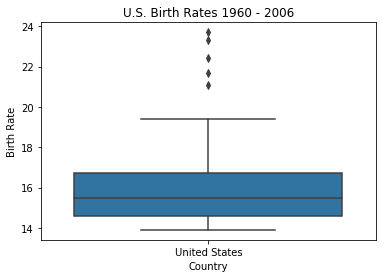

In [4]:
ax = sns.boxplot(x = birthrate_hist[(birthrate_hist["Country"]=="United States")]["Country"], 
                 y=birthrate_hist["Birth Rate"])

ax.set_title('U.S. Birth Rates 1960 - 2006')

**Bullet Chart**

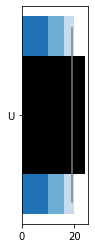

In [5]:
# transform data
birthrate_hist["BirthRate_int"] = birthrate_hist["Birth Rate"].apply(lambda x: math.ceil(x))
birthrate_bullet = birthrate_hist[birthrate_hist["Country"]=="United States"][["Country","BirthRate_int"]]
birthrate_bullet['target'] = 19
birthrate_bullet_tuple = [tuple(x) for x in birthrate_bullet.values][0]

# set parameter for bullet chart
limits = [10, 16, 20]
palette = sns.color_palette("Blues_r", len(limits))
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_yticklabels(birthrate_bullet_tuple[0])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=75, color=palette[idx])
    prev_limit = lim
    
# draw the value we're measuring
ax.barh([1], birthrate_bullet_tuple[1], color='black', height=45)

ax.axvline(birthrate_bullet_tuple[2], color="gray", ymin=0.10, ymax=0.9)

**Parallel Plot - Additional chart of your choice**

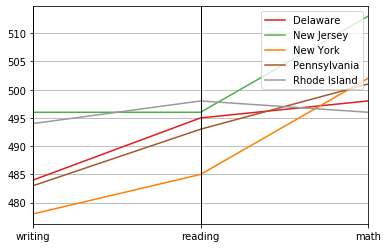

In [6]:
# transform data
from pandas.plotting import parallel_coordinates
education = pd.read_csv('education.csv')
education_parallel = education[education['state'].isin(['New York','New Jersey','Delaware','Rhode Island','Pennsylvania'])][['state','writing','reading','math']]

# make the plot
parallel_coordinates(education_parallel, 'state', colormap=plt.get_cmap("Set1"))
plt.show()